# Support Vector Machines
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.



## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("wine_fraud.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [7]:
# Calculate the difference between "free sulfur dioxide" and "total sulfur dioxide"
df['sulfur_dioxide_difference'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

# Drop the original highly correlated features
df = df.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1)

**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [8]:
unique_values = df['quality'].unique()
print(unique_values)

['Legit' 'Fraud']


**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

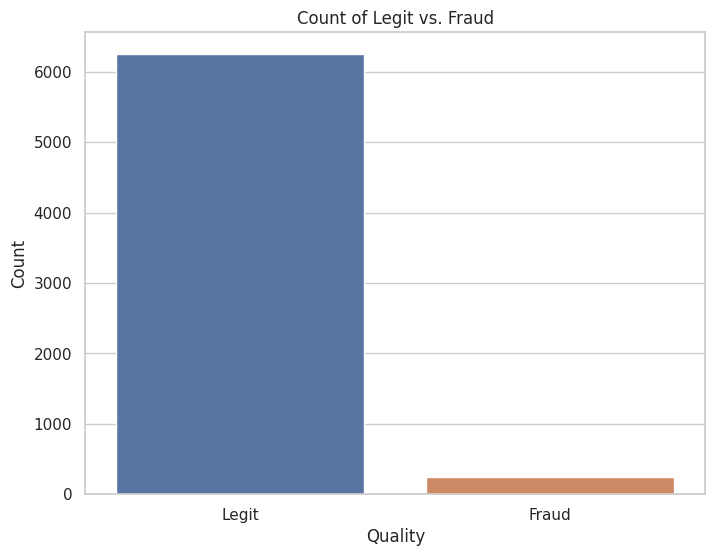

In [9]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)

# Add labels and title
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Count of Legit vs. Fraud")

# Show the countplot
plt.show()

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

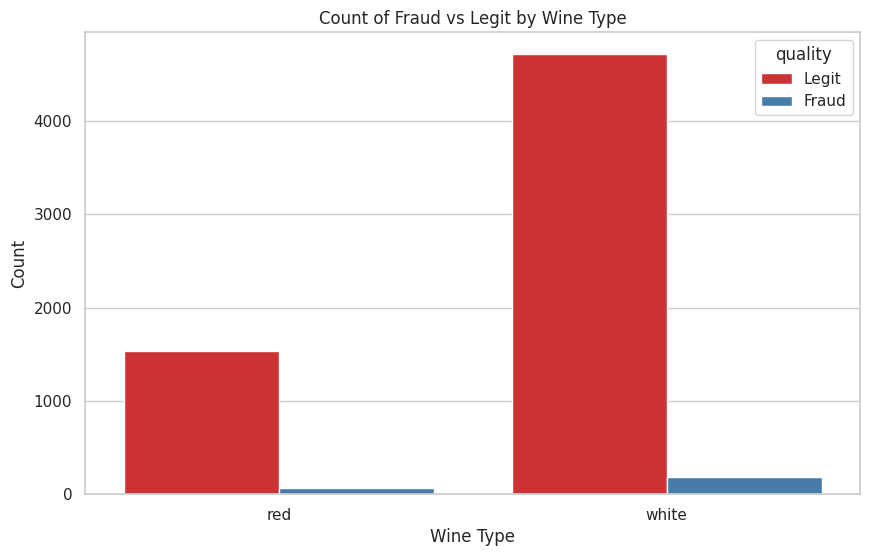

In [10]:
# Create a countplot with 'type' on the x-axis and 'hue' for 'quality'
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x='type', hue='quality', data=df, palette="Set1")

# Add labels and title
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.title("Count of Fraud vs Legit by Wine Type")

# Show the countplot
plt.show()

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [11]:
# Calculate the percentage of Fraud in red wines
red_wine_count = df[df['type'] == 'red']['quality'].count()
red_fraud_count = df[(df['type'] == 'red') & (df['quality'] == 'Fraud')]['quality'].count()
red_fraud_percentage = (red_fraud_count / red_wine_count) * 100

# Calculate the percentage of Fraud in white wines
white_wine_count = df[df['type'] == 'white']['quality'].count()
white_fraud_count = df[(df['type'] == 'white') & (df['quality'] == 'Fraud')]['quality'].count()
white_fraud_percentage = (white_fraud_count / white_wine_count) * 100

print(f"Percentage of Fraud in red wines: {red_fraud_percentage:.2f}%")
print(f"Percentage of Fraud in white wines: {white_fraud_percentage:.2f}%")

Percentage of Fraud in red wines: 3.94%
Percentage of Fraud in white wines: 3.74%


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [12]:
# Map "Legit" to 0 and "Fraud" to 1 in the "quality" column
df['quality'] = df['quality'].map({"Legit": 0, "Fraud": 1})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Correlation of features with the "quality" column
quality_correlation = correlation_matrix['quality'].drop('quality')  # Drop the "quality" column itself

# Print the correlation of each feature with "quality"
print(quality_correlation)

fixed acidity                0.021794
volatile acidity             0.151228
citric acid                 -0.061789
residual sugar              -0.048756
chlorides                    0.034499
density                      0.016351
pH                           0.020107
sulphates                   -0.034046
alcohol                     -0.051141
sulfur_dioxide_difference   -0.010572
Name: quality, dtype: float64


<ipython-input-12-471709d6b1a4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

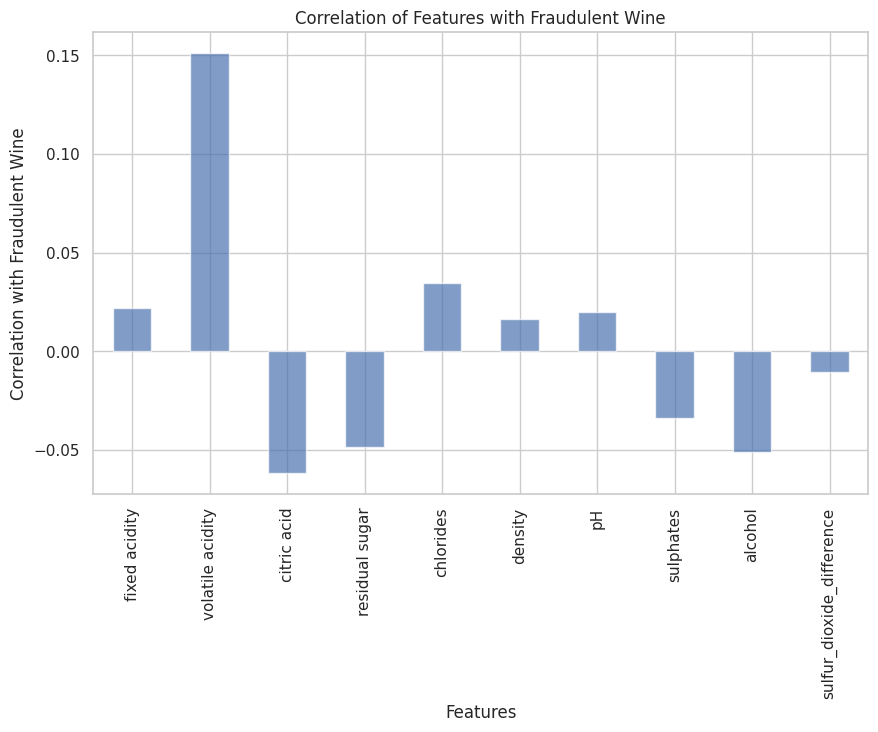

In [13]:
# Create a bar plot of the correlation values with "Fraudulent" wine
plt.figure(figsize=(10, 6))
quality_correlation.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Correlation with Fraudulent Wine")
plt.title("Correlation of Features with Fraudulent Wine")
plt.xticks(rotation=90)
plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

<ipython-input-14-ef1b336075e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Figure size 1000x800 with 0 Axes>

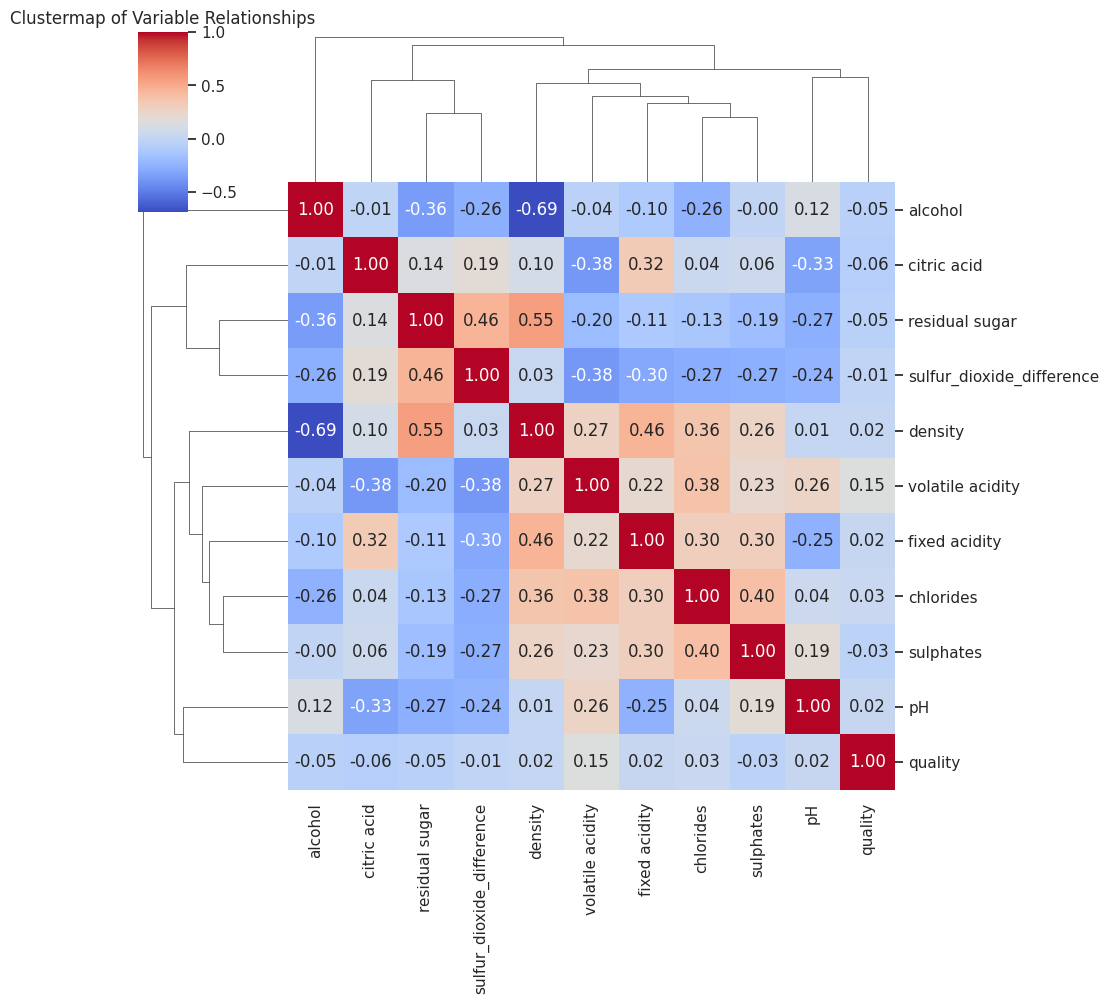

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a clustermap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)  # Adjust font size if necessary
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")

plt.title("Clustermap of Variable Relationships")
plt.show()

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [15]:
# Convert the "type" column into dummy variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,sulfur_dioxide_difference,type_white
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,23.0,0
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,0,42.0,0
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,0,39.0,0
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,0,43.0,0
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,23.0,0


**TASK: Separate out the data into X features and y target label ("quality" column)**

In [17]:
# Define the input features (X) and the target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the X train and X test data.**

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [21]:
from sklearn.svm import SVC

In [22]:
# Create an instance of the SVM classifier with balanced class weights
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')

**TASK: Display the confusion matrix and classification report for your model.**

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
# Create an instance of the SVM classifier with balanced class weights
svm_classifier = SVC(class_weight='balanced')

# Fit the SVM model to the training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(class_weight='balanced')

In [25]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_scaled)

In [26]:
# Calculate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Swap the order of labels
class_report = classification_report(y_test, y_pred, target_names=['Fraud', 'Legit'])  # Swap the order of class names

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[ 16  11]
 [121 502]]

Classification Report:
               precision    recall  f1-score   support

       Fraud       0.98      0.81      0.88       623
       Legit       0.12      0.59      0.20        27

    accuracy                           0.80       650
   macro avg       0.55      0.70      0.54       650
weighted avg       0.94      0.80      0.86       650



In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,sulfur_dioxide_difference,type_white
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,23.0,0
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,0,42.0,0
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,0,39.0,0
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,0,43.0,0
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,23.0,0


In [28]:
# "1" corresponds to "Fraud", "0" corresponds to "Legit"

In [29]:
import pickle

In [30]:
# Saving the model
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)

# Loading the model
with open('svm_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)